In [1]:
import pandas as pd
# Import data
data = data = pd.read_csv('insurance.csv')
data.shape

(1338, 7)

In [2]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
num_samples = data.shape[0]

print("Number of samples:", num_samples)


Number of samples: 1338


In [4]:
missing_values = data.isnull().sum()

print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [5]:
# there are no missing Values 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
duplicate_samples = data.duplicated()

print(duplicate_samples)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool


In [7]:
# No Duplicate Samples 
# Data Exploring Univarient
import pandas as pd

# Assuming your data is stored in a DataFrame called 'data'
summary_stats = data.describe()

print(summary_stats)


               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


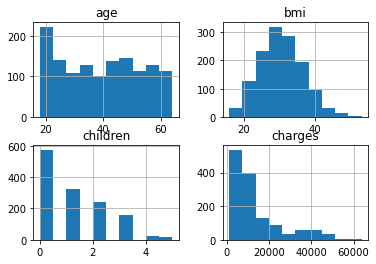

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'data'
data.hist()
plt.show()


In [9]:
import pandas as pd

# Assuming your data is stored in a DataFrame called 'data'
print(data.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


C:\Users\ASRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


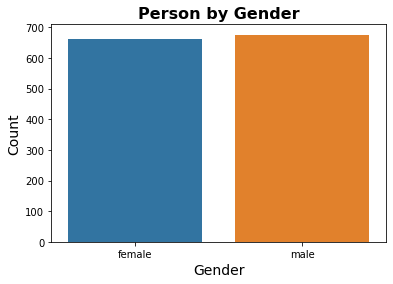

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame called 'data'
sns.countplot(data['sex'])

plt.title('Person by Gender', fontsize='16', fontweight='bold')
plt.xlabel('Gender', fontsize='14')
plt.ylabel('Count', fontsize='14')

plt.show()


C:\Users\ASRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


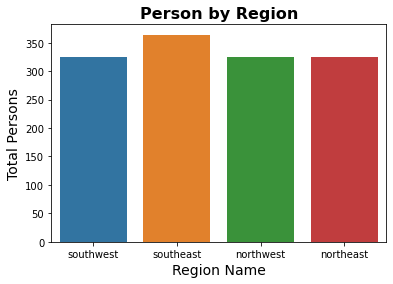

In [11]:
# Check region feature 

sns.countplot(data['region'])

plt.title('Person by Region', fontsize='16', fontweight='bold')
plt.xlabel('Region Name', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()


C:\Users\ASRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


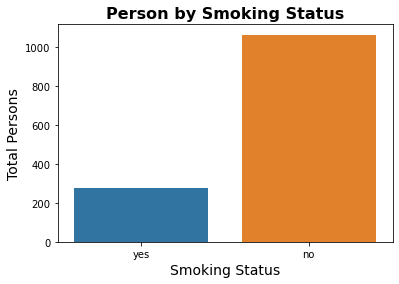

In [12]:
# Check "smoker" feature 

sns.countplot(data['smoker'])

plt.title('Person by Smoking Status', fontsize='16', fontweight='bold')
plt.xlabel('Smoking Status', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()


C:\Users\ASRA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


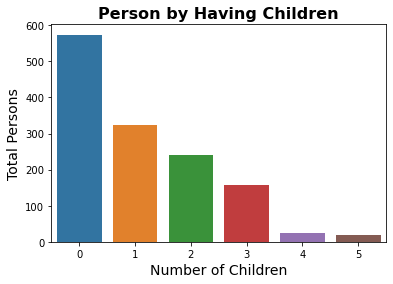

In [13]:
## Check "Smoker" feature 
sns.countplot(data['children'])

plt.title('Person by Having Children', fontsize='16', fontweight='bold')
plt.xlabel('Number of Children', fontsize='14')
plt.ylabel('Total Persons', fontsize='14')
plt.show()

## Decision: Al most 50% of the peoples have not any children. 

In [14]:
# DATA MODELING 

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data_types = data.dtypes

print(data_types)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [16]:
# Encodeing sex. 
# Male are make more expenses than female. So, let, Male = 2 and Female = 1)
data.sex.unique()
data['sex'] = data['sex'].replace(('female', 'male'), (1, 2))

In [17]:
# Encoding 'smoker'
# smoker = yes makes more expense, so let (yes = 2, no = 1)
data['smoker'] = data['smoker'].replace(('yes', 'no'), (2, 1))

In [18]:
data.region.unique()
# Southeast region makes highest expense so let region southeast = 2 and others are 1
data['region'] = data['region'].replace(('southeast', 'southwest', 'northwest', 'northeast'), (2, 1, 1, 1))

In [19]:
data.dtypes
# Now all of the features have numerical data

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [20]:
# Complete encoded data 
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,2,1,16884.9240
1,18,2,33.77,1,1,2,1725.5523
2,28,2,33.00,3,1,2,4449.4620


In [21]:
# Dependent & Independent Feature
# Seperating dependent ( charges) feature with independent (rest of the feature)

# Dependent 
y = data['charges']

In [22]:
# Independent 
x = data.drop(['charges'], axis = 1)
print(x.shape)
print(x.columns)

(1338, 6)
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [23]:
# Spliting Train & Test Data
from sklearn.model_selection import train_test_split


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

print('Size of x_train = ', x_train.shape)
print('Size of x_test  = ', x_test.shape)
print('Size of y_train = ', y_train.shape)
print('Size of y_test  = ', y_test.shape)

Size of x_train =  (1070, 6)
Size of x_test  =  (268, 6)
Size of y_train =  (1070,)
Size of y_test  =  (268,)


In [25]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [26]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
#  Applying Linear Regression Model

from sklearn.linear_model import LinearRegression 

In [28]:
model = LinearRegression()
model.fit(x_train, y_train)

y_predict = model.predict(x_test)

In [29]:
# checking model accuracy 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 

lr_r2_score = r2_score(y_test, y_predict)
print('R square Score = ', round(lr_r2_score, 3))

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('Root Mean Squared Error = ', round(rmse, 3))

R square Score =  0.798
Root Mean Squared Error =  5663.905


In [30]:
# So, If this model will predict any result it will be between actual value with plus of minus 5663.
#For that, this model will gain around 79% accuracy.

In [31]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

In [32]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

y_predict_rf = rf_model.predict(x_test)

In [33]:
# checking model accuracy 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 
rf_r2_score = r2_score(y_test, y_predict_rf)
print('R square Score = ', round(rf_r2_score, 3))

rf_mse = mean_squared_error(y_test, y_predict_rf)
rf_rmse = np.sqrt(rf_mse)
print('Root Mean Squared Error = ', round(rf_rmse, 3))

R square Score =  0.878
Root Mean Squared Error =  4401.735


In [34]:
# So, If this model will predict any result it will be between actual value with plus of minus 4448 For that, 
#this model will gain around 87% accuracy.

In [35]:
# Gradient Boosting regression 
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
gb_model = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gb_model.fit(x_train, y_train)

y_predict_gb = gb_model.predict(x_test)

In [37]:
# checking model accuracy 
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np 

gb_mse = mean_squared_error(y_test, y_predict_gb)
gb_rmse = np.sqrt(gb_mse)
print('Root Mean Squared Error = ', round(gb_rmse, 3))

gb_r2_score = r2_score(y_test, y_predict_gb)
print('R square Score = ', round(gb_r2_score, 3))

Root Mean Squared Error =  3967.33
R square Score =  0.901


In [38]:
#So, If this model will predict any result it will be between actual value with plus of minus 4063 For that,
#this model will gain around 89% accuracy.

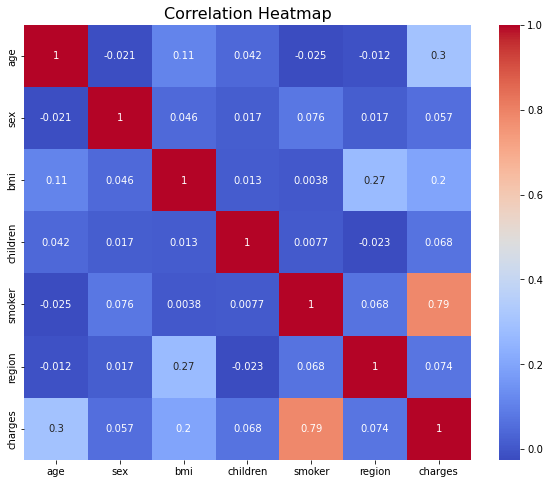

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

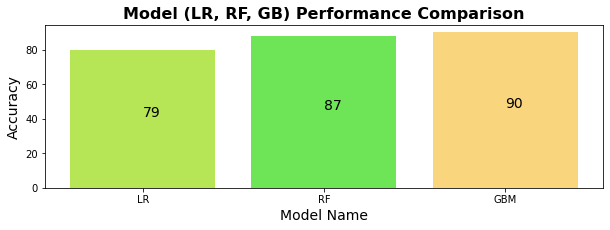

In [40]:
# Model Acuracy comparision
import numpy as np
import matplotlib.pyplot as plt


r2_scores = [lr_r2_score*100, rf_r2_score*100, gb_r2_score*100]
model_names = ['LR', 'RF', 'GBM']

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(10, 3))
bar = plt.bar(model_names, r2_scores, align='center', alpha=.75, color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Model (LR, RF, GB) Performance Comparison', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()

In [41]:
#In the provided scenario, where a regression model (specifically, LinearRegression) is being used,
#there is no need to create a confusion matrix or ROC curve. 
#These evaluation techniques are primarily used for assessing the performance of binary classification models.
#However, in regression tasks, the goal is to predict continuous values rather than class labels. 
#Therefore, it is more appropriate to evaluate the regression model using metrics such as R-squared and Mean Squared Error (MSE), 
#which provide insights into the model's fit and predictive accuracy for continuous variables. 
#Creating a confusion matrix or ROC curve would not provide meaningful information in this regression context.

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)
print('Mean Squared Error (MSE) = ', mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predict)
print('Mean Absolute Error (MAE) = ', mae)



Mean Squared Error (MSE) =  32079820.931481596
Mean Absolute Error (MAE) =  3940.1546901992033
